Warsaw Apartment Price Prediction


In [1]:
from bs4 import BeautifulSoup

from requests import get
import requests
#import sqlite3
#from sys import argv
#import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
#from geopy.geocoders import Nominatim
#from geopy.distance import great_circle
#import folium
#import json

#import matplotlib.cm as cm
#import matplotlib.colors as colors
#import matplotlib.pyplot as plt

#import seaborn as sns
#from pandas.io.json import json_normalize 

#from sklearn.cluster import KMeans

1. Scraping local website

Set URL address to local website with apartments ad

In [ ]:
URL = 'https://www.olx.pl/nieruchomosci/mieszkania/wynajem/warszawa/'
flats = []

In [ ]:
def parse_price(price):
    return float(price.replace(' ','').replace('zł','').replace(',','.'))

In [ ]:
def parse_page(pageNumber):
    print(f'Processing......... Page number {pageNumber}')
    page = get(f'{URL}?page={pageNumber}')
    bs = BeautifulSoup(page.content, 'html.parser')
    
    for offer in bs.find_all('div', class_='offer-wrapper'):
        footer = offer.find('td', class_ = 'bottom-cell')
        test = footer.find('small', class_='breadcrumb').get_text().strip().split(',')

        #Processing of the ads from the pageNumber 
        link = offer.find('a')
        #print(link['href'])
        URL2 = link['href']
        i = URL2.find("otodom")

        if ((len(test)>1) and (i == -1)):
            location = footer.find('small', class_='breadcrumb').get_text().strip().split(',')[1]
            #print(location)
            title = offer.find('strong').get_text().strip()
            #print(title)
            price = parse_price(offer.find('p',class_='price').get_text().strip())
            #print(price)
            
            #Processing of the ads from the pageNumber 
            link = offer.find('a')
            #print(link['href'])
            URL2 = link['href']
            page2 = get(URL2)
            #print(URL2)
            bs2 = BeautifulSoup(page2.content, 'html.parser')
            #print(bs2)
            offer2 = bs2.find_all('div', class_='clr descriptioncontent marginbott20')
            #offer_detail_names_ = bs2.find_all('span', class_='offer-details__name')
            #offer_detail_values_ = bs2.find_all('strong', class_='offer-details__value')

            offer_detail_names_ = bs2.find('ul', class_='css-sfcl1s').get_text()
            offer_detail_values_ = bs2.find_all('strong', class_='offer-details__value')
                
            offer_detail_names=[]
            offer_detail_values=[]
            #for i in offer_detail_names_:
                #offer_detail_names.append(i.contents[0])
            for i in offer_detail_values_:
                offer_detail_values.append(i.contents[0])
            #print(offer_detail_names_)
            #print(type(offer_detail_names_))
            #print(offer_detail_names)

                    
            if 'Powierzchnia' in offer_detail_names_:
                #print("Powierzchnia")
                #print(offer_detail_names_)    
                i = offer_detail_names_.index('Powierzchnia') 
                #print(i)
                #print(offer_detail_names_[i+13])
                #print(offer_detail_names_)
                j= offer_detail_names_.index('m²')
                #print(j)
                k = (offer_detail_names_[i+13:j-1])
                k = k.replace(',','.')
                k=float(k)
                #print(k)
                #print(type(k))
                size_m2 = k
                #print(size_m2)
                #size_ = offer_detail_values[i].string
                #size_ = size_[:-2]
                #if ',' in size_:
                    #size_ = size_.replace(',','.')
                #size = float(size_)
                #print(size)
            if 'Liczba pokoi' in offer_detail_names_:
                #print('Lczba pokoi')
                i = offer_detail_names_.index('Liczba pokoi')
                #k = int(offer_detail_names_[i+13:i+15])
                k = offer_detail_names_[i+13:i+15]
                if k == ' K':
                    room_number = 1
                else:
                    k = int(k)
                    room_number = k
                #print(room_number)
            if 'Czynsz (dodatkowo):' in offer_detail_names_:
                i = offer_detail_names_.index('Czynsz (dodatkowo):')
                j= offer_detail_names_.index('zł')
                k = (offer_detail_names_[i+20:j-1])
                k = k.replace(" ",'')
                k = k.replace(",",".")
                k = float(k)
                rent = k
                #print(rent)
                
                #i = offer_detail_names.index('Liczba pokoi')
                #rooms_ = offer_detail_values[i].string
                #if rooms_ == 'Kawalerka':
                    #rooms = 1
                #else:
                    #rooms_ = rooms_[:-6]
                    #rooms = int(re.search(r'\d+', rooms_).group(0))
                #print(rooms)
            flats.append([location,size_m2,room_number,price,rent,URL2])

In [ ]:
for page in range (1,26):
    parse_page(page)

Processing......... Page number 1
Processing......... Page number 2
Processing......... Page number 3
Processing......... Page number 4
Processing......... Page number 5
Processing......... Page number 6
Processing......... Page number 7
Processing......... Page number 8
Processing......... Page number 9
Processing......... Page number 10
Processing......... Page number 11
Processing......... Page number 12
Processing......... Page number 13
Processing......... Page number 14
Processing......... Page number 15
Processing......... Page number 16
Processing......... Page number 17
Processing......... Page number 18
Processing......... Page number 19
Processing......... Page number 20
Processing......... Page number 21
Processing......... Page number 22
Processing......... Page number 23
Processing......... Page number 24
Processing......... Page number 25


In [ ]:
column_names = ['District', 'Size m2', 'Rooms number', 'Price' , 'Rent', 'URL']
flatsOffers = pd.DataFrame(flats, columns=column_names)
flatsOffers.head()

,District,Size m2,Rooms number,Price,Rent,URL
0,Wola,46.0,2,2500.0,500.00,https://www.olx.pl/d/oferta/mieszkanie-2-pokoj...
1,Praga-Południe,52.0,2,1700.0,500.00,https://www.olx.pl/d/oferta/waszyngtona-39-2-p...
2,Bielany,28.0,1,2200.0,1.00,https://www.olx.pl/d/oferta/kawalerka-na-wynaj...
3,Śródmieście,47.0,2,2500.0,0.01,https://www.olx.pl/d/oferta/47m2-karmelicka-w-...
4,Praga-Północ,35.0,2,2000.0,1.00,https://www.olx.pl/d/oferta/przytulne-mieszkan...


In [ ]:
# save to CSV
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
flatsOffers.to_csv('/content/drive/My Drive/Data Science/Warsaw Apartment Price Prediction 02/flatsOffers.csv', encoding='utf-8', index=False)

In [2]:
#load data from csv
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
flatsOffersLoaded = pd.read_csv('gdrive/My Drive/Data Science/Warsaw Apartment Price Prediction 02/flatsOffers.csv')

In [4]:
flatsOffersLoaded

,District,Size m2,Rooms number,Price,Rent,URL
0,Wola,46.0,2,2500.0,500.00,https://www.olx.pl/d/oferta/mieszkanie-2-pokoj...
1,Praga-Południe,52.0,2,1700.0,500.00,https://www.olx.pl/d/oferta/waszyngtona-39-2-p...
2,Bielany,28.0,1,2200.0,1.00,https://www.olx.pl/d/oferta/kawalerka-na-wynaj...
3,Śródmieście,47.0,2,2500.0,0.01,https://www.olx.pl/d/oferta/47m2-karmelicka-w-...
4,Praga-Północ,35.0,2,2000.0,1.00,https://www.olx.pl/d/oferta/przytulne-mieszkan...
...,...,...,...,...,...,...
951,Praga-Południe,32.0,1,1800.0,1.00,https://www.olx.pl/d/oferta/mieszkanie-32m2-sa...
952,Mokotów,57.0,3,2400.0,400.00,https://www.olx.pl/d/oferta/sloneczne-3-pokojo...
953,Bemowo,30.0,2,2300.0,350.00,https://www.olx.pl/d/oferta/wynajme-mieszkanie...
954,Bemowo,67.0,3,2400.0,600.00,https://www.olx.pl/d/oferta/bezposrednio-3-pok...


In [5]:
df1 = flatsOffersLoaded.iloc[:,0:3]

In [6]:
df1['Price'] = flatsOffersLoaded['Price']+flatsOffersLoaded['Rent']

In [7]:
df1.head()

,District,Size m2,Rooms number,Price
0,Wola,46.0,2,3000.00
1,Praga-Południe,52.0,2,2200.00
2,Bielany,28.0,1,2201.00
3,Śródmieście,47.0,2,2500.01
4,Praga-Północ,35.0,2,2001.00


In [8]:
df1.shape

(956, 4)

In [9]:
df1['District'].value_counts()

 Śródmieście       125
 Mokotów           123
 Praga-Południe    106
 Wola               96
 Białołęka          70
 Targówek           62
 Ursynów            58
 Bemowo             55
 Ochota             50
 Bielany            42
 Praga-Północ       41
 Żoliborz           35
 Ursus              29
 Włochy             22
 Wawer              19
 Wilanów            10
 Rembertów           9
 Wesoła              4
Name: District, dtype: int64

In [10]:
df1['District'].unique()

array([' Wola', ' Praga-Południe', ' Bielany', ' Śródmieście',
       ' Praga-Północ', ' Targówek', ' Białołęka', ' Ochota', ' Mokotów',
       ' Bemowo', ' Ursus', ' Żoliborz', ' Ursynów', ' Rembertów',
       ' Wilanów', ' Włochy', ' Wawer', ' Wesoła'], dtype=object)

In [11]:
df1.isnull().sum()

District        0
Size m2         0
Rooms number    0
Price           0
dtype: int64

In [12]:
for number in range(df1.shape[0]):
  df1.iloc[number,0] = df1.iloc[number,0].strip()

In [13]:
df2 = df1.copy()
df2['price_per_size'] = round(df2['Price']/df2['Size m2'],2)
df2.head()

,District,Size m2,Rooms number,Price,price_per_size
0,Wola,46.0,2,3000.00,65.22
1,Praga-Południe,52.0,2,2200.00,42.31
2,Bielany,28.0,1,2201.00,78.61
3,Śródmieście,47.0,2,2500.01,53.19
4,Praga-Północ,35.0,2,2001.00,57.17


In [14]:
len(df2.District.unique())

18

In [15]:
location_stats = df2['District'].value_counts(ascending=False)
location_stats

Śródmieście       125
Mokotów           123
Praga-Południe    106
Wola               96
Białołęka          70
Targówek           62
Ursynów            58
Bemowo             55
Ochota             50
Bielany            42
Praga-Północ       41
Żoliborz           35
Ursus              29
Włochy             22
Wawer              19
Wilanów            10
Rembertów           9
Wesoła              4
Name: District, dtype: int64

In [16]:
df2.head(10)

,District,Size m2,Rooms number,Price,price_per_size
0,Wola,46.0,2,3000.00,65.22
1,Praga-Południe,52.0,2,2200.00,42.31
2,Bielany,28.0,1,2201.00,78.61
3,Śródmieście,47.0,2,2500.01,53.19
4,Praga-Północ,35.0,2,2001.00,57.17
5,Targówek,30.0,1,1900.01,63.33
6,Śródmieście,40.0,2,2200.00,55.00
7,Śródmieście,33.0,2,2900.00,87.88
8,Śródmieście,43.0,2,2670.00,62.09
9,Białołęka,44.0,2,2600.00,59.09


In [17]:
df2.shape

(956, 5)

In [18]:
df2.price_per_size.describe()

count       956.000000
mean        452.557218
std       11978.797532
min           3.020000
25%          50.007500
50%          59.325000
75%          70.410000
max      370433.700000
Name: price_per_size, dtype: float64

In [19]:
df3 = df2.rename(columns = {'Size m2': 'Size_m2', 'Rooms number': 'Rooms_number'}, inplace = False)
df3.head()

,District,Size_m2,Rooms_number,Price,price_per_size
0,Wola,46.0,2,3000.00,65.22
1,Praga-Południe,52.0,2,2200.00,42.31
2,Bielany,28.0,1,2201.00,78.61
3,Śródmieście,47.0,2,2500.01,53.19
4,Praga-Północ,35.0,2,2001.00,57.17


In [20]:
df3[df3.price_per_size<25]

,District,Size_m2,Rooms_number,Price,price_per_size
29,Wola,53.0,2,1290.0,24.34
246,Żoliborz,37.0,1,201.0,5.43
259,Śródmieście,50.0,3,151.0,3.02
310,Targówek,89.0,3,2001.0,22.48
437,Wola,155.0,1,1246.0,8.04
519,Mokotów,50.0,4,951.0,19.02
590,Praga-Południe,80.0,1,1800.0,22.50
671,Ochota,55.0,2,1310.0,23.82
749,Wola,150.0,1,1211.0,8.07
750,Śródmieście,150.0,1,1234.0,8.23


In [21]:
df4 = df3[~(df3.price_per_size<25)]
df4.shape

(945, 5)

In [22]:
df4[df4.price_per_size>150]

,District,Size_m2,Rooms_number,Price,price_per_size
27,Praga-Południe,34.0,2,33232.0,977.41
144,Bielany,42.0,2,14445.0,343.93
260,Bielany,42.0,2,14445.0,343.93
552,Praga-Południe,30.0,2,11113011.0,370433.70
620,Targówek,10.0,1,2150.0,215.00
857,Praga-Południe,1.0,3,2000.0,2000.00
934,Targówek,10.0,1,2150.0,215.00


In [23]:
df5 = df4[~(df4.price_per_size>150)]
df5.shape

(938, 5)

In [24]:
df5.Rooms_number.describe()

count    938.000000
mean       1.950959
std        0.709551
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Rooms_number, dtype: float64

In [25]:
df5.groupby('Rooms_number').count()

,District,Size_m2,Price,price_per_size
Rooms_number,,,,
1,246,246,246,246
2,506,506,506,506
3,172,172,172,172
4,14,14,14,14


In [26]:
df5.District.value_counts()

Mokotów           122
Śródmieście       122
Praga-Południe    102
Wola               93
Białołęka          70
Targówek           59
Ursynów            58
Bemowo             55
Ochota             49
Praga-Północ       41
Bielany            40
Żoliborz           34
Ursus              29
Włochy             22
Wawer              19
Wilanów            10
Rembertów           9
Wesoła              4
Name: District, dtype: int64

In [27]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('District'):
        m = np.mean(subdf.price_per_size)
        st = np.std(subdf.price_per_size)
        reduced_df = subdf[(subdf.price_per_size>(m-st)) & (subdf.price_per_size<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(703, 5)

    District  Size_m2  Rooms_number   Price  price_per_size
134  Mokotów     60.0             3  3200.0           53.33
136  Mokotów     90.0             3  5500.0           61.11
144  Mokotów     63.0             3  4800.0           76.19
147  Mokotów     80.0             3  5601.0           70.01
165  Mokotów     49.0             3  2850.0           58.16


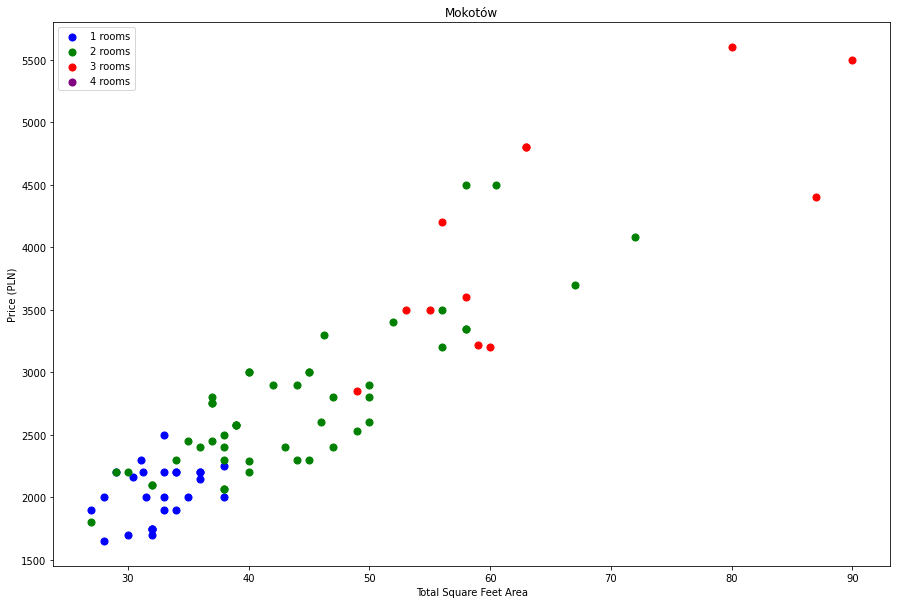

In [28]:
def plot_scatter_chart(df,location):
    bhk1 = df[(df.District==location) & (df.Rooms_number==1)]
    bhk2 = df[(df.District==location) & (df.Rooms_number==2)]
    bhk3 = df[(df.District==location) & (df.Rooms_number==3)]
    bhk4 = df[(df.District==location) & (df.Rooms_number==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.Size_m2,bhk1.Price,color='blue',label='1 rooms', s=50)
    plt.scatter(bhk2.Size_m2,bhk2.Price,color='green',label='2 rooms', s=50)
    plt.scatter(bhk3.Size_m2,bhk3.Price,color='red',label='3 rooms', s=50)
    plt.scatter(bhk4.Size_m2,bhk4.Price,color='purple',label='4 rooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (PLN)")
    plt.title(location)
    plt.legend()
    print(bhk3.head())
    
plot_scatter_chart(df6,"Mokotów")

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('District'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Rooms_number'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_size),
                'std': np.std(bhk_df.price_per_size),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Rooms_number'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_size<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(451, 5)

    District  Size_m2  Rooms_number   Price  price_per_size
144  Mokotów     63.0             3  4800.0           76.19
147  Mokotów     80.0             3  5601.0           70.01
169  Mokotów     55.0             3  3500.0           63.64
176  Mokotów     63.0             3  4800.0           76.19
201  Mokotów     56.0             3  4200.0           75.00


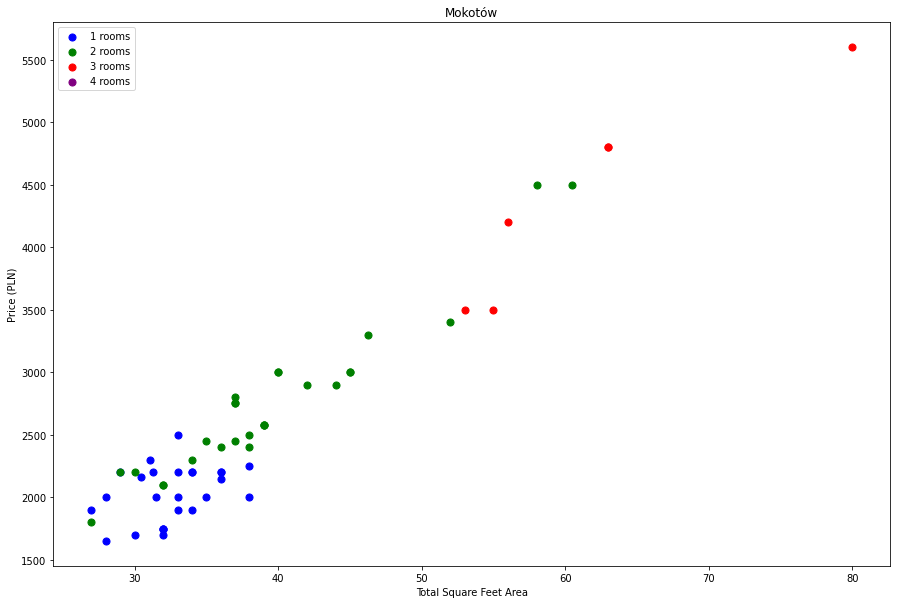

In [30]:
plot_scatter_chart(df7,"Mokotów")

Text(0, 0.5, 'Count')

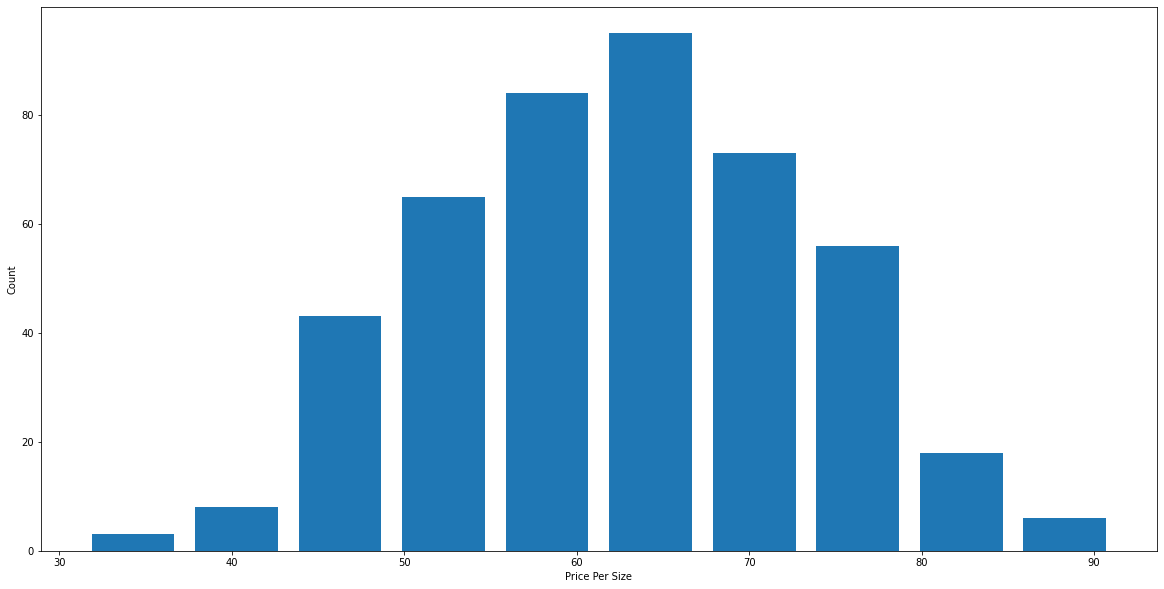

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_size,rwidth=0.8)
plt.xlabel("Price Per Size")
plt.ylabel("Count")

In [32]:
df8 = df7.drop(['price_per_size'],axis='columns')
df8.head()

,District,Size_m2,Rooms_number,Price
0,Bemowo,50.0,2,2301.0
1,Bemowo,37.5,2,1900.0
2,Bemowo,42.0,2,2601.0
3,Bemowo,42.0,2,2501.0
4,Bemowo,59.0,2,2401.0


In [33]:
dummies = pd.get_dummies(df8.District)
dummies.head(3)

,Bemowo,Białołęka,Bielany,Mokotów,Ochota,Praga-Południe,Praga-Północ,Rembertów,Targówek,Ursus,Ursynów,Wawer,Wesoła,Wilanów,Wola,Włochy,Śródmieście,Żoliborz
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,District,Size_m2,Rooms_number,Price,Bemowo,Białołęka,Bielany,Mokotów,Ochota,Praga-Południe,Praga-Północ,Rembertów,Targówek,Ursus,Ursynów,Wawer,Wesoła,Wilanów,Wola,Włochy,Śródmieście,Żoliborz
0,Bemowo,50.0,2,2301.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bemowo,37.5,2,1900.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bemowo,42.0,2,2601.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bemowo,42.0,2,2501.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bemowo,59.0,2,2401.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df10 = df9.drop('District',axis='columns')
df10.head()

,Size_m2,Rooms_number,Price,Bemowo,Białołęka,Bielany,Mokotów,Ochota,Praga-Południe,Praga-Północ,Rembertów,Targówek,Ursus,Ursynów,Wawer,Wesoła,Wilanów,Wola,Włochy,Śródmieście,Żoliborz
0,50.0,2,2301.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.5,2,1900.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42.0,2,2601.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.0,2,2501.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59.0,2,2401.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df10.shape

(451, 21)

In [37]:
X = df10.drop(['Price'],axis='columns')
X.head()

,Size_m2,Rooms_number,Bemowo,Białołęka,Bielany,Mokotów,Ochota,Praga-Południe,Praga-Północ,Rembertów,Targówek,Ursus,Ursynów,Wawer,Wesoła,Wilanów,Wola,Włochy,Śródmieście,Żoliborz
0,50.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(451, 20)

In [39]:
y = df10.Price
y.head()

0    2301.0
1    1900.0
2    2601.0
3    2501.0
4    2401.0
Name: Price, dtype: float64

In [40]:
len(y)

451

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8564960138491753

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89103108, 0.83939538, 0.83297745, 0.82465704, 0.8147595 ])

In [45]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.840985,{'normalize': True}
1,lasso,0.842091,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.766362,"{'criterion': 'mse', 'splitter': 'best'}"


In [46]:
def predict_price(location,sqft,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [47]:
predict_price('Wola',20,2)

1916.5195282586317

In [48]:
predict_price('Bemowo',38,3)

2405.43134920267

In [49]:
predict_price('Mokotów',20,2)

1865.3721698458608

In [50]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pickle
with open('/content/drive/My Drive/Data Science/Warsaw Apartment Price Prediction 02/warsaw_apartments_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("/content/drive/My Drive/Data Science/Warsaw Apartment Price Prediction 02/columns.json","w") as f:
    f.write(json.dumps(columns,ensure_ascii=False))